In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np
import requests

browser = Browser('firefox')

## Iterating through Numbers pages to store all the data

In [2]:
numbers_url = "https://www.the-numbers.com/movie/budgets/all"
browser.visit(numbers_url)

# Create empty lists for rows
headers = []
data_rows = []

# Create the full list of page clicks
all_page_clicks=[]
all_page_numbers = np.arange(101, 6501, 100)
for page in all_page_numbers:
    if page < 1000:
        all_page_clicks.append(str(page)+"-")
    elif page < 10000:
        if page%1000 == 1:
            all_page_clicks.append(str(page//1000)+",001-")
        else:
            all_page_clicks.append(str(page//1000)+","+str(page%1000))

for i in range(len(all_page_numbers)+1):
    # Scrape the website
    html = browser.html
    # Create a Beautiful Soup object
    soup = BeautifulSoup(html, "html.parser")
    # Extract all rows
    all_rows = soup.find_all("tr")
    
    # Loop through the scraped data to create a list of headers for first iteration only
    if i == 0:
        header_scrape = all_rows[0].find_all("th")
        for header in header_scrape:
            headers.append(header.text)

    # Loop through the scraped data to create a list of data rows
    for row in all_rows[1:]:
        data = []
        for r in row.find_all("td"):
            data.append(r.text)
        data_rows.append(data)
    if i < len(all_page_numbers):
        print("clicking " + all_page_clicks[i])
        browser.links.find_by_partial_text(all_page_clicks[i]).click()

clicking 101-
clicking 201-
clicking 301-
clicking 401-
clicking 501-
clicking 601-
clicking 701-
clicking 801-
clicking 901-
clicking 1,001-
clicking 1,101
clicking 1,201
clicking 1,301
clicking 1,401
clicking 1,501
clicking 1,601
clicking 1,701
clicking 1,801
clicking 1,901
clicking 2,001-
clicking 2,101
clicking 2,201
clicking 2,301
clicking 2,401
clicking 2,501
clicking 2,601
clicking 2,701
clicking 2,801
clicking 2,901
clicking 3,001-
clicking 3,101
clicking 3,201
clicking 3,301
clicking 3,401
clicking 3,501
clicking 3,601
clicking 3,701
clicking 3,801
clicking 3,901
clicking 4,001-
clicking 4,101
clicking 4,201
clicking 4,301
clicking 4,401
clicking 4,501
clicking 4,601
clicking 4,701
clicking 4,801
clicking 4,901
clicking 5,001-
clicking 5,101
clicking 5,201
clicking 5,301
clicking 5,401
clicking 5,501
clicking 5,601
clicking 5,701
clicking 5,801
clicking 5,901
clicking 6,001-
clicking 6,101
clicking 6,201
clicking 6,301
clicking 6,401


In [3]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
movies_df = pd.DataFrame(data_rows, columns=headers)
movies_df

,,ReleaseDate,Movie,ProductionBudget,DomesticGross,WorldwideGross
0,1,"Dec 9, 2022",Avatar: The Way of Water,"$460,000,000","$684,075,767","$2,319,591,720"
1,2,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,788,912,285"
2,3,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802"
3,4,"Apr 22, 2015",Avengers: Age of Ultron,"$365,000,000","$459,005,868","$1,395,316,979"
4,5,"May 17, 2023",Fast X,"$340,000,000","$145,960,660","$714,414,576"
...,...,...,...,...,...,...
6435,"6,436","Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
6436,"6,437","Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
6437,"6,438","Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
6438,"6,439","Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [4]:
# Drop the website's index column
movies_df = movies_df[['ReleaseDate', 'Movie', 'ProductionBudget', 'DomesticGross', 'WorldwideGross']]
movies_df.head()

,ReleaseDate,Movie,ProductionBudget,DomesticGross,WorldwideGross
0,"Dec 9, 2022",Avatar: The Way of Water,"$460,000,000","$684,075,767","$2,319,591,720"
1,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,788,912,285"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802"
3,"Apr 22, 2015",Avengers: Age of Ultron,"$365,000,000","$459,005,868","$1,395,316,979"
4,"May 17, 2023",Fast X,"$340,000,000","$145,960,660","$714,414,576"


# Pull the OMDBAPI Data
Leverages the movie list from the Numbers scrape

In [5]:


dftitle = pd.read_table('./Resources/titlebasics.tsv')
dropno_nums = dftitle.replace('\\N', '0')
dropno_numsdf=pd.DataFrame(dropno_nums)


fields_to_extract = ['Title', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 
                     'Writer', 'Actors', 'Language', 'Country', 'Type', 'Metascore', 
                     'imdbRating', 'imdbVotes', 'BoxOffice', 'Production']

C:\Users\bryan\AppData\Local\Temp\ipykernel_112312\2050218660.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  dftitle = pd.read_table('./Resources/titlebasics.tsv')


In [15]:
dropno_numsdf.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,0,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,0,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,0,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,0,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,0,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,0,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,0,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,0,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,0,45,Romance
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,0,1,"Documentary,Short"


In [44]:
dropno_numsdf['startYear']=dropno_numsdf['startYear'].astype('int')
df1980=dropno_numsdf[dropno_numsdf['startYear']>1980]
df1980['Movie']=df1980['primaryTitle']
df1980=df1980.drop(['primaryTitle'],axis=1)
df1980=df1980.drop(['originalTitle'],axis=1)
df1980.head(-10)



C:\Users\bryan\AppData\Local\Temp\ipykernel_112312\743130682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1980['Movie']=df1980['primaryTitle']


,tconst,titleType,isAdult,startYear,endYear,runtimeMinutes,genres,Movie
919,tt0000929,short,0,1990,0,0,"Comedy,Short",Klebolin klebt alles
965,tt0000977,short,0,1990,0,0,Short,Mutterliebe
11636,tt0011801,movie,0,2019,0,0,"Action,Crime",Tötet nicht mehr
13081,tt0013274,movie,0,2021,0,94,Documentary,Istoriya grazhdanskoy voyny
15176,tt0015414,movie,0,2000,0,60,0,La tierra de los toros
...,...,...,...,...,...,...,...,...
10316934,tt9916824,tvEpisode,0,2009,0,0,"Action,Drama,Family",Episode #3.9
10316935,tt9916826,tvEpisode,0,2009,0,0,"Action,Drama,Family",Episode #3.10
10316937,tt9916832,tvEpisode,0,2009,0,0,"Action,Drama,Family",Episode #3.11
10316938,tt9916834,tvEpisode,0,2009,0,0,"Action,Drama,Family",Episode #3.12


In [58]:
df1980movies=df1980[df1980['titleType']=='movie']
dfratings = pd.read_table('./Resources/ratings.tsv')
merged_ratings= pd.merge(dfratings,df1980movies,on='tconst')
merged_ratings.head(-10)
merged_ratings['tconst'].nunique()


221933

In [55]:
# Iterate through each row in the DataFrame and append selected fields from the API response

#merged_movies= pd.merge(movies_df,merged_ratings,on='Movie')
merged_ratings.head(10)


,tconst,averageRating,numVotes,titleType,isAdult,startYear,endYear,runtimeMinutes,genres,Movie
0,tt0013274,6.8,59,movie,0,2021,0,94,Documentary,Istoriya grazhdanskoy voyny
1,tt0015414,5.2,16,movie,0,2000,0,60,0,La tierra de los toros
2,tt0015724,6.1,27,movie,0,1993,0,102,"Drama,Mystery,Romance",Dama de noche
3,tt0035423,6.4,87965,movie,0,2001,0,118,"Comedy,Fantasy,Romance",Kate & Leopold
4,tt0036606,6.5,345,movie,0,1983,0,118,"Drama,War","Another Time, Another Place"
5,tt0038086,7.0,27,movie,0,1993,0,0,Thriller,Shiva und die Galgenblume
6,tt0057461,4.5,23,movie,0,1983,0,84,"Drama,Fantasy",La rosa de los vientos
7,tt0059325,6.5,257,movie,0,1990,0,100,"Drama,Romance",Born in '45
8,tt0059900,6.4,38,movie,0,1990,0,78,"Drama,Fantasy","Wenn du groß bist, lieber Adam"
9,tt0062181,6.5,401,movie,0,1981,0,80,Drama,Hands Up!


In [26]:
#print(len(merged_movies))

8981


In [47]:
merged_ratings.to_csv("./Resources/movies_raw_imdb.csv")

# Format column data types from objects to numbers

In [ ]:
#  Import and read the data if you screwed up :)
# movies_df = pd.read_csv("./Resources/movies_raw.csv")
# movies_df = movies_df[['ReleaseDate', 'Movie', 'ProductionBudget', 'DomesticGross', 'WorldwideGross', 
#                         'OMDB_Title', 'OMDB_Rated','OMDB_Released', 'OMDB_Runtime', 'OMDB_Genre', 'OMDB_Director',
#                         'OMDB_Writer', 'OMDB_Actors', 'OMDB_Language', 'OMDB_Country', 'OMDB_Metascore', 
#                         'OMDB_imdbRating', 'OMDB_imdbVotes', 'OMDB_BoxOffice', 'OMDB_Production']]
# movies_df.head()

# Minor Processing

## Look at what values should be consolidated

In [23]:
movies_df.columns

Index(['ReleaseDate', 'Movie', 'ProductionBudget', 'DomesticGross',
       'WorldwideGross'],
      dtype='object')

In [70]:
# Look at Rated values to see if consolidation would be beneficial
movies_df['OMDB_Rated'].value_counts()

Series([], Name: OMDB_Rated, dtype: int64)

Number of movies in dataset: 221933


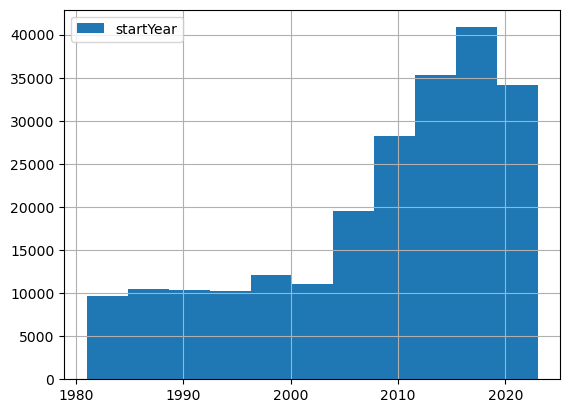

In [51]:
# for index, row in movies_df.iterrows():
#     movie_year = row['ReleaseYear']
#     if movie_year <= 1970:
#         movies_df.at[index,'ReleaseYear'] = '1970 or before'

# movies_df['ReleaseYear'].value_counts()

# Drop the earlier movies (low count and significant $ differences)

print(f'Number of movies in dataset: {len(merged_ratings)}')
year_hist2 = merged_ratings['startYear'].hist(bins=11, legend=True)

# Investigate distribution and relationships of potential outcomes

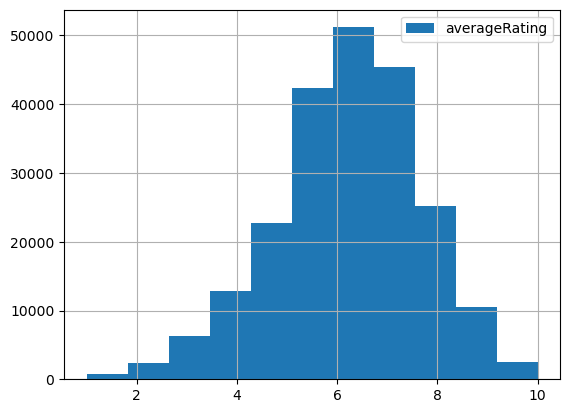

In [54]:
imdb_rating_hist = merged_ratings['averageRating'].hist(bins=11, legend=True)

### Verify assumed Metascore & IMDB Rating correlation

y = 0.0x + 6.2
The r-squared is: 0.003385046150173549


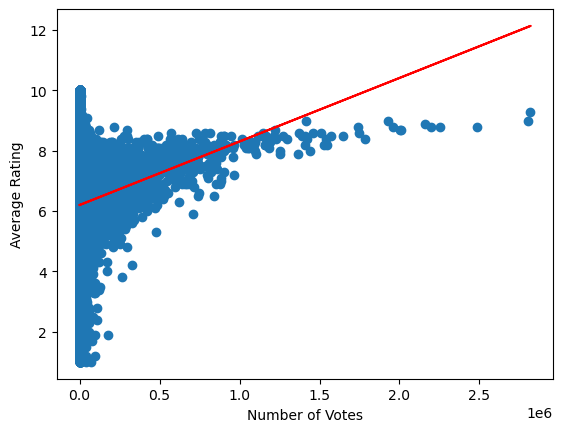

In [64]:
# Plot the different factors in a scatter plot
y_values= merged_ratings['averageRating']
x_values = merged_ratings['numVotes']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')

print(line_eq)
print(f"The r-squared is: {rvalue**2}")
plt.show()

### Check for relationship of production budget vs. IMDB rating / MetaScore / BoxOffice

In [95]:
movies_df.to_csv("./Resources/movies_processed.csv")